<h2>Fase 1: Business Understanding</h2>


<h5>Importar librerías y base de datos</h5>

<h5>Esto hay que cambiarlo, solo es lo del pdf. Hay que incluir una hipotesis de como podemos ayudar al Dormamu</h5>

<p>
Dormammu ha encargado a sus ingenieros hacer estudios sobre los clientes del banco Monopoly, para conocer su
comportamiento y detectar patrones. Además, debe analizar cómo será su estrategia para abordar estos nuevos clientes dado el uso que ellos
hacen de sus productos financieros

Usted es parte del equipo de ingenieros del banco Dormammu, y con sus colegas debe analizar esta base, limpiarla, seleccionar las variables que
sirvan para alguna interpretación y entregar la mayor información posible a los dueños de este banco para que puedan conocer a los clientes,
preparar una estrategia y abordar a este nuevo mercado.
</p>

<h3>Revisar con chatgpt</h3>Decidimos concentrarnos en el uso de tarjeta de credito del cliente ya que nosotros hipotetizamos que es en donde se mueve mas dinero para el cliente y donde podriamos ver mas posibles ganancias que podrian darle interes al banco Dormamu

In [65]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from pathlib import Path
from sklearn.preprocessing import StandardScaler

In [12]:
MONOPOLY_XLSX ='Base_clientes_Monopoly.xlsx'
MONOPOLY_CSV ='Base_clientes_Monopoly_otro.csv'

In [19]:
try:
    import common
    DATA = common.dataDirectory()
except ImportError:
    DATA = Path().resolve() / 'data'

In [13]:
df = pd.read_excel(MONOPOLY_XLSX)
df.head(10)

,Id,Subsegmento,Sexo,Region,Edad,Renta,Antiguedad,Internauta,Adicional,Dualidad,...,ColMx_T01,PagoNac_T01,PagoInt_T01,EeccNac_T01,EeccInt_T01,UsoL1_T01,UsoL2_T01,UsoLI_T01,IndRev_T01,target
0,1,160,M,13.0,43,NaN,130,1,1,0,...,0.0,33000,0.0,1099866.0,0.0,1099866.0,15080,0.0,R,0
1,2,160,H,13.0,46,143640.0,69,1,0,0,...,0.0,300000,0.0,214592.0,0.0,214592.0,83596,0.0,R,0
2,3,170,H,13.0,45,929106.0,24,1,1,0,...,0.0,216676,0.0,0.0,0.0,7400.0,0,0.0,T,0
3,4,151,H,13.0,46,172447.0,134,0,1,0,...,0.0,60000,0.0,272762.0,0.0,272762.0,10591,0.0,R,0
4,5,170,H,13.0,46,805250.0,116,0,1,1,...,0.0,272925,0.0,249562.0,0.0,75339.0,377782,0.0,R,0
5,6,170,H,13.0,47,707664.0,67,1,1,0,...,0.0,35800,0.0,35800.0,0.0,0.0,51197,0.0,R,0
6,7,811,H,13.0,48,1022833.0,21,1,0,1,...,0.0,9391,0.0,8818.0,0.0,8818.0,0,0.0,T,0
7,8,170,H,13.0,46,NaN,69,0,1,1,...,0.0,6000,0.0,283520.0,0.0,283520.0,0,0.0,R,0
8,9,170,H,13.0,49,1171066.0,33,0,0,0,...,0.0,60000,0.0,507629.0,0.0,507629.0,0,0.0,R,1
9,10,170,M,13.0,44,964387.0,23,1,1,0,...,0.0,92583,0.0,65487.0,0.0,65487.0,12084,0.0,R,0


<h2>Fase 2: Data Understanding</h2>

In [26]:
print(df.shape)
print(df.dtypes)
print(df.info())

(51124, 574)
Id               int64
Subsegmento      int64
Sexo            object
Region         float64
Edad             int64
                ...   
UsoL1_T01      float64
UsoL2_T01        int64
UsoLI_T01      float64
IndRev_T01      object
target           int64
Length: 574, dtype: object
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51124 entries, 0 to 51123
Columns: 574 entries, Id to target
dtypes: float64(508), int64(53), object(13)
memory usage: 223.9+ MB
None


In [33]:
percentages = [0.05, 0.25, 0.5, 0.75, 0.95, 1]
df_1 = pd.DataFrame(df['TC'].quantile(percentages))
df_1.index = [f'{p * 100}%' for p in percentages]
print(df_1.transpose())

    5.0%  25.0%  50.0%  75.0%  95.0%  100%
TC   1.0    1.0    2.0    2.0    3.0  12.0


In [39]:
max_cards_customer = df.loc[df['TC'].idxmax()]
print(f"The customer with the most credit cards is {max_cards_customer['Id']} with {max_cards_customer['TC']} credit cards.")

The customer with the most credit cards is 2718 with 12 credit cards.


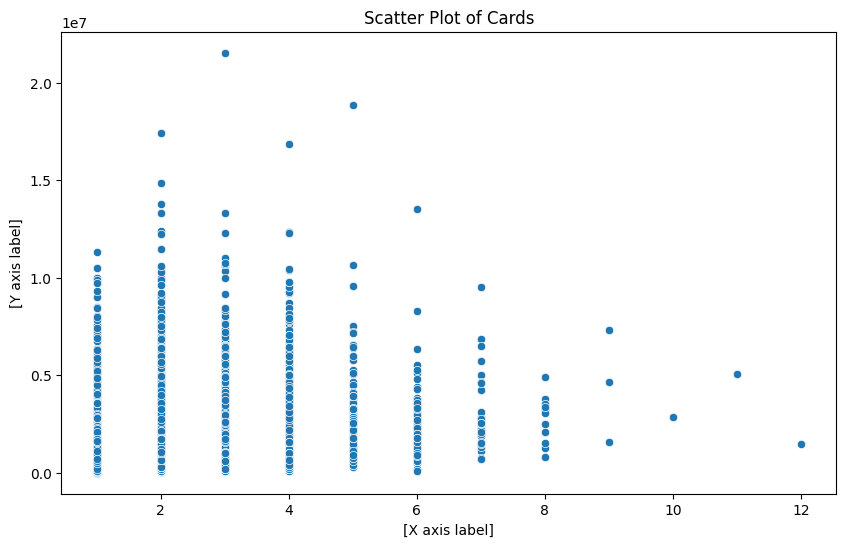

In [64]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='TC', y='CUPO_L1', data=df)
plt.title('Scatter Plot of Cards')
plt.xlabel('[X axis label]')
plt.ylabel('[Y axis label]')
plt.show()

In [32]:
df.isnull().sum()

Id              0
Subsegmento     0
Sexo            1
Region         53
Edad            0
               ..
UsoL1_T01       0
UsoL2_T01       0
UsoLI_T01       0
IndRev_T01      0
target          0
Length: 574, dtype: int64

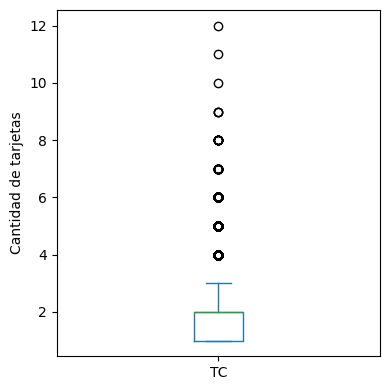

In [42]:
ax = (df['TC']).plot.box(figsize=(4, 4))
ax.set_ylabel('Cantidad de tarjetas')

plt.tight_layout()
plt.show()

<h2>Fase 3: Data Preparation</h2>